<a href="https://colab.research.google.com/github/coppermilk/colab/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import keras as k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [5]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 44225 bytes


In [ ]:
df = pd.read_csv("titanic.csv")
input_names = ["Age", "Sex", "Pclass"]
output_names = ["Survived"]
print(df[input_names])

raw_input_data = df[input_names]
raw_output_data = df[output_names]

max_age = 100
encoders = {"Age": lambda age: [age/max_age],
            "Sex": lambda gen: {"male":[0], "female": [1]}.get(gen),
            "Pclass": lambda pclass:{1: [1,0,0], 2:[0,1,0], 3:[0,0,1]}.get(pclass),
            "Survived": lambda s_value : [s_value]}
def df_to_dict(df):
  result = dict()
  for column in df.columns:
    values = df[column].values
    result[column] = values
  return result


def make_supervised(df):
  raw_input_data = df[input_names]
  raw_output_data = df[output_names]
  return{"inputs": df_to_dict(raw_input_data),
         "outputs": df_to_dict(raw_output_data)}


def encode(data):
  vectors = []
  for data_name, data_values in data.items():
    encoded = list(map(encoders[data_name], data_values))
    vectors.append(encoded)
  formatted = []
  for vector_raw in list(zip(*vectors)):
    vector = []
    for element in vector_raw:
      for e in element:
        vector.append(e)
    formatted.append(vector)
  return formatted
supervised = make_supervised(df)
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))
print(encoded_outputs)

In [37]:
train_x = encoded_inputs[:600]
train_y = encoded_outputs[:600]

test_x = encoded_inputs[600:]
test_y = encoded_outputs[600:]

model = k.Sequential()
model.add(k.layers.Dense(units=5, activation="relu"))
model.add(k.layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])
model.load_weights("weights.h5")
fit_results = model.fit(x=train_x, y=train_y, epochs=100, validation_split=0.2)
model.save_weights("weights.h5")

Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 0.2727 - accuracy: 0.5667 - val_loss: 0.2633 - val_accuracy: 0.5250
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.5708 - val_loss: 0.2624 - val_accuracy: 0.5250
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2709 - accuracy: 0.5667 - val_loss: 0.2615 - val_accuracy: 0.5250
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.5729 - val_loss: 0.2607 - val_accuracy: 0.5417
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2691 - accuracy: 0.5750 - val_loss: 0.2598 - val_accuracy: 0.5500
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2683 - accuracy: 0.5750 - val_loss: 0.2590 - val_accuracy: 0.5583
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2674 - accuracy: 0.5813 - val_loss: 0.2582 - val_accuracy: 0.5583
Epoch 8/100


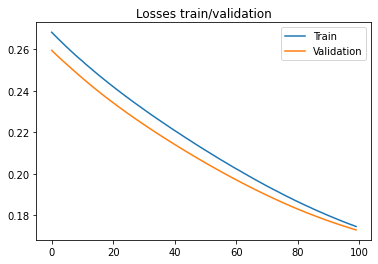

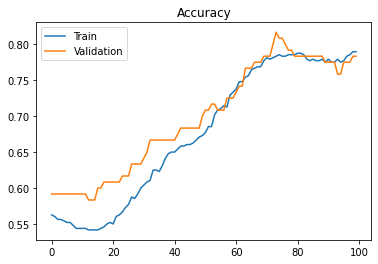

In [35]:
plt.title("Losses train/validation")
plt.plot(fit_results.history['loss'], label="Train")
plt.plot(fit_results.history['val_loss'], label="Validation")
plt.legend()
plt.show()

plt.title("Accuracy")
plt.plot(fit_results.history['accuracy'], label="Train")
plt.plot(fit_results.history['val_accuracy'], label="Validation")
plt.legend()
plt.show()

In [36]:
predicted_test = model.predict(test_x)
real_data = df.iloc[600:][input_names+output_names]
real_data["PSurvived"] = predicted_test
print(real_data)

9/9 [==============================] - 0s 2ms/step
      Age     Sex  Pclass  Survived  PSurvived
600  44.0    male       3         0   0.230177
601  35.0    male       1         1   0.363934
602  36.0    male       3         0   0.242286
603  30.0    male       3         0   0.251649
604  27.0    male       1         1   0.370918
..    ...     ...     ...       ...        ...
882  27.0    male       2         0   0.421789
883  19.0  female       1         1   0.665842
884   7.0  female       3         0   0.542589
885  26.0    male       1         1   0.372882
886  32.0    male       3         0   0.248501

[287 rows x 5 columns]
